## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_svmlight_format',
 'base',
 'california_housing',
 'clear_data_home',
 'covtype',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_mldata',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'kddcup99',
 'lfw',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_ran

## 1. 選取資料集 1. breast_cancer

In [3]:
breast_cancer = datasets.load_breast_cancer()

In [4]:
print(breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

0. Malignant: 惡性的
1. Benign: 良性

兩個分類, 使用 logistic

In [5]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

C:\Users\mhchan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8771929824561403


## 2. 因為選取的第一筆資料集為 Logistic, 現在找一個 Linear 的資料集 load_boston

In [7]:
boston = datasets.load_boston()

In [8]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Attribute: CRIM
Coefficients:  [-0.44294703]
Mean squared error: 76.11


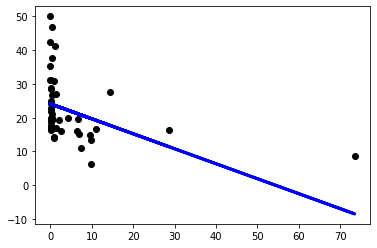

Attribute: ZN
Coefficients:  [0.14048843]
Mean squared error: 63.78


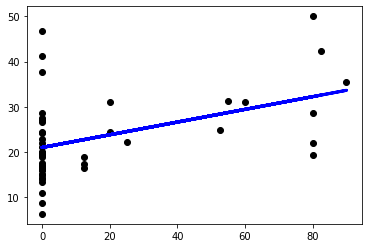

Attribute: INDUS
Coefficients:  [-0.64959885]
Mean squared error: 63.06


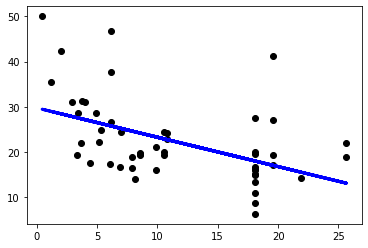

Attribute: CHAS
Coefficients:  [7.48533333]
Mean squared error: 88.06


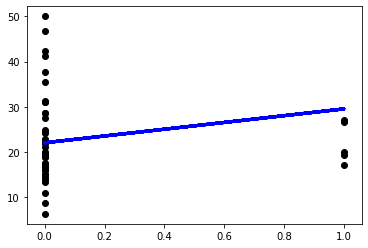

Attribute: NOX
Coefficients:  [-34.09301439]
Mean squared error: 67.72


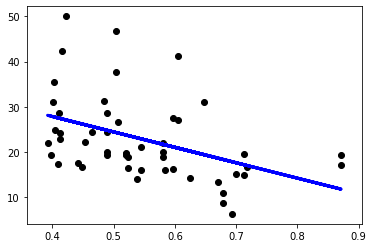

Attribute: RM
Coefficients:  [8.95430408]
Mean squared error: 32.40


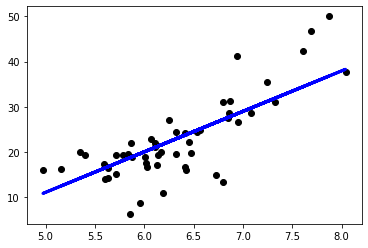

Attribute: AGE
Coefficients:  [-0.12145796]
Mean squared error: 64.85


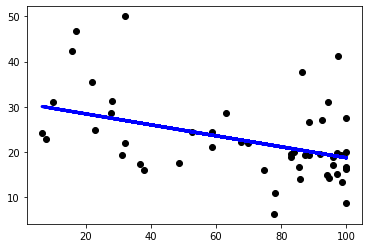

Attribute: DIS
Coefficients:  [1.08133057]
Mean squared error: 75.82


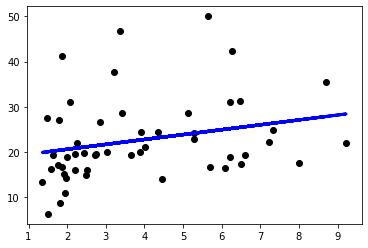

Attribute: RAD
Coefficients:  [-0.40020672]
Mean squared error: 68.87


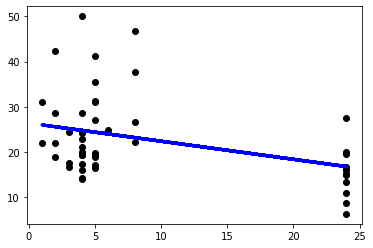

Attribute: TAX
Coefficients:  [-0.02558027]
Mean squared error: 65.46


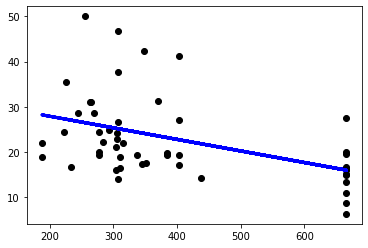

Attribute: PTRATIO
Coefficients:  [-2.13846286]
Mean squared error: 57.17


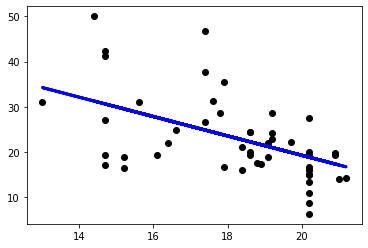

Attribute: B
Coefficients:  [0.03381633]
Mean squared error: 72.46


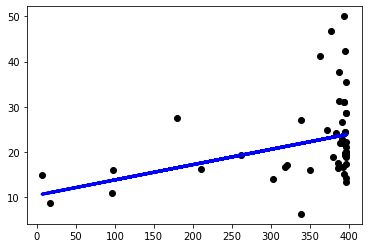

Attribute: LSTAT
Coefficients:  [-0.94532598]
Mean squared error: 35.54


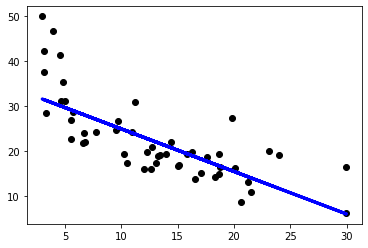

In [9]:
mse_vec = np.zeros(boston.data.shape[1])
# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
for i in range(boston.data.shape[1]):
    X = boston.data[:, np.newaxis, i]
    print("Attribute:", boston.feature_names[i])

    # 切分訓練集/測試集
    x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.1, random_state=4)

    # 建立一個線性回歸模型
    regr = linear_model.LinearRegression()

    # 將訓練資料丟進去模型訓練
    regr.fit(x_train, y_train)

    # 將測試資料丟進模型得到預測結果
    y_pred = regr.predict(x_test)

    # 可以看回歸模型的參數值
    print('Coefficients: ', regr.coef_)

    # 預測值與實際值的差距，使用 MSE
    mse = mean_squared_error(y_test, y_pred)
    print("Mean squared error: %.2f"
          % mse)
    mse_vec[i] = mse
    # 畫出回歸模型與實際資料的分佈
    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_test, y_pred, color='blue', linewidth=3)
    plt.show()

### 找出 MSE 最小的屬性

In [10]:
print(np.min(mse_vec))
print(boston.feature_names[mse_vec == np.min(mse_vec)][0])

32.39645564588156
RM


### 跟全部屬性都使用來比較

In [11]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [-1.25856659e-01  4.84257396e-02  1.84085281e-02  3.08509569e+00
 -1.73277018e+01  3.61674713e+00  2.19181853e-03 -1.49361132e+00
  3.19979200e-01 -1.27294649e-02 -9.27469086e-01  9.50912468e-03
 -5.33592471e-01]
Mean squared error: 17.04


### 使用多個屬性的結果甚至比只用單一屬性之最佳結果好